In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

def plot_roc(i, fpr, tpr, roc_auc):
    plt.figure()
    lw = 2
    plt.plot(fpr[i], tpr[i], color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

In [2]:
import mnist
import tensorflow as tf
# Training Parameters
learning_rate = 0.001
num_steps = 200
batch_size = 128

# number of classes trained on
num_classes = 2
num_adversarial = 10 #how many adversarial examples should be generated (if any) per iteration
num_adversarial_train = 5 # how many iterations for the adversarial

/Users/LeanderK/Documents/ML/contingency/venv/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


Training Accuracy in iteration  0 : 0.366667
Training Accuracy in iteration  50 : 1.0
Training Accuracy in iteration  100 : 1.0
Training Accuracy in iteration  150 : 1.0
Final Accuracy on only valid classes 199 : 0.998582
Final Accuracy on unexpected data 199 : 0.585796


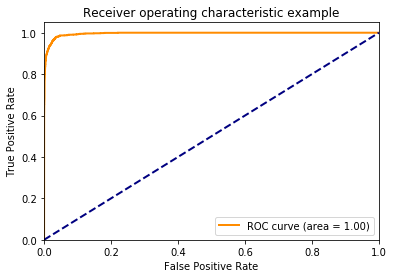

In [3]:
tf.reset_default_graph()
mnistCont = mnist.MNistContingency(learning_rate, num_adversarial, num_adversarial_train, num_classes)
(fpr, tpr, roc_auc, pred) = mnist.run(mnistCont.withContingency, learning_rate, mnistCont, batch_size, num_steps)
plot_roc(0, fpr, tpr, roc_auc)

In [3]:
tf.reset_default_graph()
mnistCont = mnist.MNistContingency(learning_rate, num_steps, batch_size, num_classes, num_adversarial)
(fpr, tpr, roc_auc, pred) = mnistCont.run(mnistCont.withoutContingency)
plot_roc(0, fpr, tpr, roc_auc)

Generated contingency in iteration  0 : 0
Training Accuracy in iteration  0 : 0.101562
Generated contingency in iteration  50 : 0
Training Accuracy in iteration  50 : 0.921875
Generated contingency in iteration  100 : 0
Training Accuracy in iteration  100 : 0.945312
Generated contingency in iteration  150 : 0
Training Accuracy in iteration  150 : 0.945312
Final Accuracy on only valid classes 199 : 0.9722


InvalidArgumentError: Reshape cannot infer the missing input size for an empty tensor unless all specified input sizes are non-zero
	 [[Node: ConvNet/Flatten/flatten/Reshape = Reshape[T=DT_FLOAT, Tshape=DT_INT32, _device="/job:localhost/replica:0/task:0/device:CPU:0"](ConvNet/max_pooling2d_2/MaxPool, ConvNet/Flatten/flatten/Reshape/shape)]]

Caused by op 'ConvNet/Flatten/flatten/Reshape', defined at:
  File "/usr/local/Cellar/python3/3.6.2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/local/Cellar/python3/3.6.2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/Users/LeanderK/Documents/ML/contingency/venv/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/Users/LeanderK/Documents/ML/contingency/venv/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/Users/LeanderK/Documents/ML/contingency/venv/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "/Users/LeanderK/Documents/ML/contingency/venv/lib/python3.6/site-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/Users/LeanderK/Documents/ML/contingency/venv/lib/python3.6/site-packages/tornado/ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "/Users/LeanderK/Documents/ML/contingency/venv/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/Users/LeanderK/Documents/ML/contingency/venv/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/Users/LeanderK/Documents/ML/contingency/venv/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/Users/LeanderK/Documents/ML/contingency/venv/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/Users/LeanderK/Documents/ML/contingency/venv/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/Users/LeanderK/Documents/ML/contingency/venv/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/Users/LeanderK/Documents/ML/contingency/venv/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 235, in dispatch_shell
    handler(stream, idents, msg)
  File "/Users/LeanderK/Documents/ML/contingency/venv/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/Users/LeanderK/Documents/ML/contingency/venv/lib/python3.6/site-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/Users/LeanderK/Documents/ML/contingency/venv/lib/python3.6/site-packages/ipykernel/zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/Users/LeanderK/Documents/ML/contingency/venv/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2728, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/Users/LeanderK/Documents/ML/contingency/venv/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2850, in run_ast_nodes
    if self.run_code(code, result):
  File "/Users/LeanderK/Documents/ML/contingency/venv/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2910, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-3-1524987db0a0>", line 3, in <module>
    (fpr, tpr, roc_auc, pred) = mnistCont.run(mnistCont.withoutContingency)
  File "/Users/LeanderK/Documents/ML/contingency/contingency.py", line 136, in run
    (acc_eval, pred_eval, train_fn) = run_fn(images, labels, is_training)
  File "/Users/LeanderK/Documents/ML/contingency/contingency.py", line 42, in withoutContingency
    (loss_op, pred, acc) = self.model_fn(features, labels, self.num_classes, is_training, False)
  File "/Users/LeanderK/Documents/ML/contingency/mnist.py", line 66, in model_fn
    logits = conv_net(features, num_classes, dropout, is_training=is_training, should_reuse=should_reuse)
  File "/Users/LeanderK/Documents/ML/contingency/mnist.py", line 49, in conv_net
    fc1 = tf.contrib.layers.flatten(conv2)
  File "/Users/LeanderK/Documents/ML/contingency/venv/lib/python3.6/site-packages/tensorflow/contrib/framework/python/ops/arg_scope.py", line 181, in func_with_args
    return func(*args, **current_args)
  File "/Users/LeanderK/Documents/ML/contingency/venv/lib/python3.6/site-packages/tensorflow/contrib/layers/python/layers/layers.py", line 1434, in flatten
    outputs = core_layers.flatten(inputs)
  File "/Users/LeanderK/Documents/ML/contingency/venv/lib/python3.6/site-packages/tensorflow/python/layers/core.py", line 400, in flatten
    return layer.apply(inputs)
  File "/Users/LeanderK/Documents/ML/contingency/venv/lib/python3.6/site-packages/tensorflow/python/layers/base.py", line 671, in apply
    return self.__call__(inputs, *args, **kwargs)
  File "/Users/LeanderK/Documents/ML/contingency/venv/lib/python3.6/site-packages/tensorflow/python/layers/base.py", line 575, in __call__
    outputs = self.call(inputs, *args, **kwargs)
  File "/Users/LeanderK/Documents/ML/contingency/venv/lib/python3.6/site-packages/tensorflow/python/layers/core.py", line 362, in call
    outputs = array_ops.reshape(inputs, (array_ops.shape(inputs)[0], -1))
  File "/Users/LeanderK/Documents/ML/contingency/venv/lib/python3.6/site-packages/tensorflow/python/ops/gen_array_ops.py", line 3938, in reshape
    "Reshape", tensor=tensor, shape=shape, name=name)
  File "/Users/LeanderK/Documents/ML/contingency/venv/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/Users/LeanderK/Documents/ML/contingency/venv/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 2956, in create_op
    op_def=op_def)
  File "/Users/LeanderK/Documents/ML/contingency/venv/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 1470, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

InvalidArgumentError (see above for traceback): Reshape cannot infer the missing input size for an empty tensor unless all specified input sizes are non-zero
	 [[Node: ConvNet/Flatten/flatten/Reshape = Reshape[T=DT_FLOAT, Tshape=DT_INT32, _device="/job:localhost/replica:0/task:0/device:CPU:0"](ConvNet/max_pooling2d_2/MaxPool, ConvNet/Flatten/flatten/Reshape/shape)]]


In [3]:
tf.reset_default_graph()
mnistCont = mnist.MNistContingency(learning_rate, num_steps, batch_size, num_classes, num_adversarial)
(fpr, tpr, roc_auc, pred) = mnistCont.run(mnistCont.withRandomContingency)
plot_roc(0, fpr, tpr, roc_auc)

TypeError: model_fn() missing 1 required positional argument: 'should_reuse'

In [52]:
np.where(mnist.test.labels >= num_classes)

(array([   0,    7,    8, ..., 9992, 9998, 9999]),)

In [5]:
mnist.test.images[:]

array([], shape=(0, 784), dtype=float32)